In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
import tensorflow as tf

In [11]:
(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

print('Training images shape: ' + str(train_images.shape))
print('Training targets shape: ' + str(train_targets.shape))
print('Targets: ' + str(train_targets))

Training images shape: (60000, 28, 28)
Training targets shape: (60000,)
Targets: [5 0 4 ... 5 6 8]


In [12]:
# Plot the first 10 digits
def digits_plotter(n_digits):

    # Temporary hide Seaborn grid lines
    with sns.axes_style('white'):
        plt.figure(figsize=(12, 6))
        for i in range(n_digits):
            digit = test_images[i]
            fig = plt.subplot(2, 5, i + 1)
            plt.imshow(digit, cmap=plt.cm.binary)

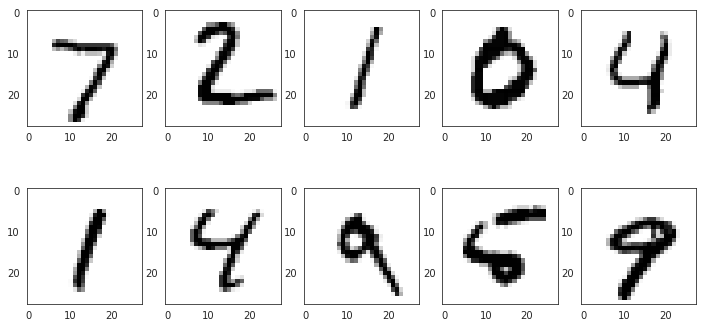

In [13]:
digits_plotter(10)

In [14]:
# Reshape images data into a (number of samples, 28x28) matrix
x_train = train_images.reshape((60000, 28 * 28))
x_test = test_images.reshape((10000, 28 * 28))

# Change pixel values from (0, 255) to (0, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encoding of expected results
y_train = to_categorical(train_targets)
y_test = to_categorical(test_targets)

print('Encoded targets shape: ' + str(y_train.shape))

# Show a sample of encoded input
df = pd.DataFrame(y_train)
df.sample(n=10)

Encoded targets shape: (60000, 10)


,0,1,2,3,4,5,6,7,8,9
18145,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23566,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32507,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
57229,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
47719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40694,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16578,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28254,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35628,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
# Create a (784, 15, 10) model
model = Sequential()
model.add(Dense(15, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10))
model.add(Activation(tf.nn.softmax))

# Describe the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Custom function because there is a bug with Keras
import keras.backend as K
def get_categorical_accuracy_keras(y_true, y_pred):
    return K.mean(K.equal(K.argmax(y_true, axis=1), K.argmax(y_pred, axis=1)))


In [17]:
model.compile(loss=categorical_crossentropy, 
              optimizer='adam', 
              metrics=[get_categorical_accuracy_keras])
history = model.fit(x_train, y_train, epochs=10, batch_size=128)


Epoch 1/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.6548 - get_categorical_accuracy_keras: 0.8242
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.3010 - get_categorical_accuracy_keras: 0.9155
Epoch 3/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2528 - get_categorical_accuracy_keras: 0.9287
Epoch 4/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2276 - get_categorical_accuracy_keras: 0.9359
Epoch 5/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2102 - get_categorical_accuracy_keras: 0.9397
Epoch 6/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.1976 - get_categorical_accuracy_keras: 0.9430
Epoch 7/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1873 - get_categorical_accuracy_keras: 0.9460
Epoch 8/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1789 - get_categorical_accurac

In [19]:
history.history

{'loss': [0.6547992764631907,
  0.30101314946810404,
  0.2527715094566345,
  0.22759126558303833,
  0.2101970175743103,
  0.1975946843147278,
  0.18727677997748057,
  0.17892273925940197,
  0.1720492792526881,
  0.16644012693564098],
 'get_categorical_accuracy_keras': [0.8242,
  0.9155166666984558,
  0.9286666666666666,
  0.9359166666348775,
  0.9396833333015442,
  0.9429833333015442,
  0.9459833333015442,
  0.9487333333651224,
  0.9508666666348775,
  0.9515333333333333]}

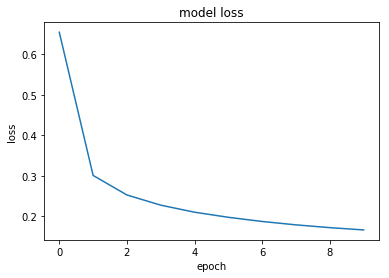

In [18]:
# Plot Loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

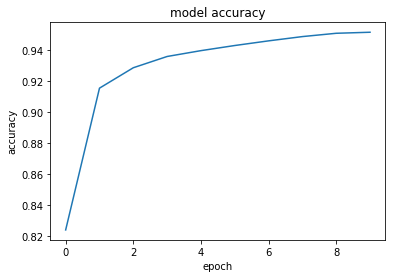

In [20]:
# Plot Loss
plt.plot(history.history['get_categorical_accuracy_keras'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
